In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_Colon_homo_p11-28.csv'
data_df = pd.read_csv(file_path)

# dol_mapping = {
#     'P11': ['073B', '075B', '081B', '083B', '085B', '088B', '097B', '105B', '106B', '107B'],
#     'P14': ['140B', '146B', '151B', '156B', '158B', '161B', '162B', '167B', '258B', '259B', '260B', '261B'],
#     'P28': ['111B', '115B', '119B', '120B', '124B', '129B', '134B', '135B']
# }

# DOL groupings and sample identifiers as provided
dol_mapping = {
    "P11": ["050A", "052A", "059A", "064A", "065A", "074A", "086A", "095A", "103A", "229A", "233A", "234A", "237A", "238A", "239A"],
    "P14": ["141A", "142A", "145A", "148A", "149A", "155A", "157A", "163A", "165A", "166A", "168A", "249A", "250A", "252A", "253A", "254A", "256A"],
    "P28": ["109A", "112A", "113A", "114A", "121A", "122A", "126A", "130A", "133A", "138A"]
}

# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)

data_df


,050A,052A,059A,064A,065A,074A,086A,095A,103A,109A,...,234A,237A,238A,239A,249A,250A,252A,253A,254A,256A
class,,,,,,,,,,,,,,,,,,,,,
Actinobacteria,0,0,0,0,0,5,5,0,0,391,...,0,0,0,0,92,0,12,0,0,0
Bacteroidetes,0,4,0,0,0,467,21,1434,0,8487,...,5444,11178,3541,2077,10038,11605,11540,9910,10076,27
Deferribacteres,0,0,0,0,0,0,0,0,0,52,...,0,0,0,0,27,0,1,0,0,0
Firmicutes,12317,14825,11790,18640,15220,17979,10911,11758,17825,9861,...,9110,6458,14690,15963,7935,6913,7439,9188,7395,12019
Proteobacteria,6825,4313,7352,502,3922,691,8205,5950,1317,98,...,4588,1021,911,1102,1050,624,150,44,1671,7096
Tenericutes,0,0,0,0,0,0,0,0,0,253,...,0,485,0,0,0,0,0,0,0,0
DOL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


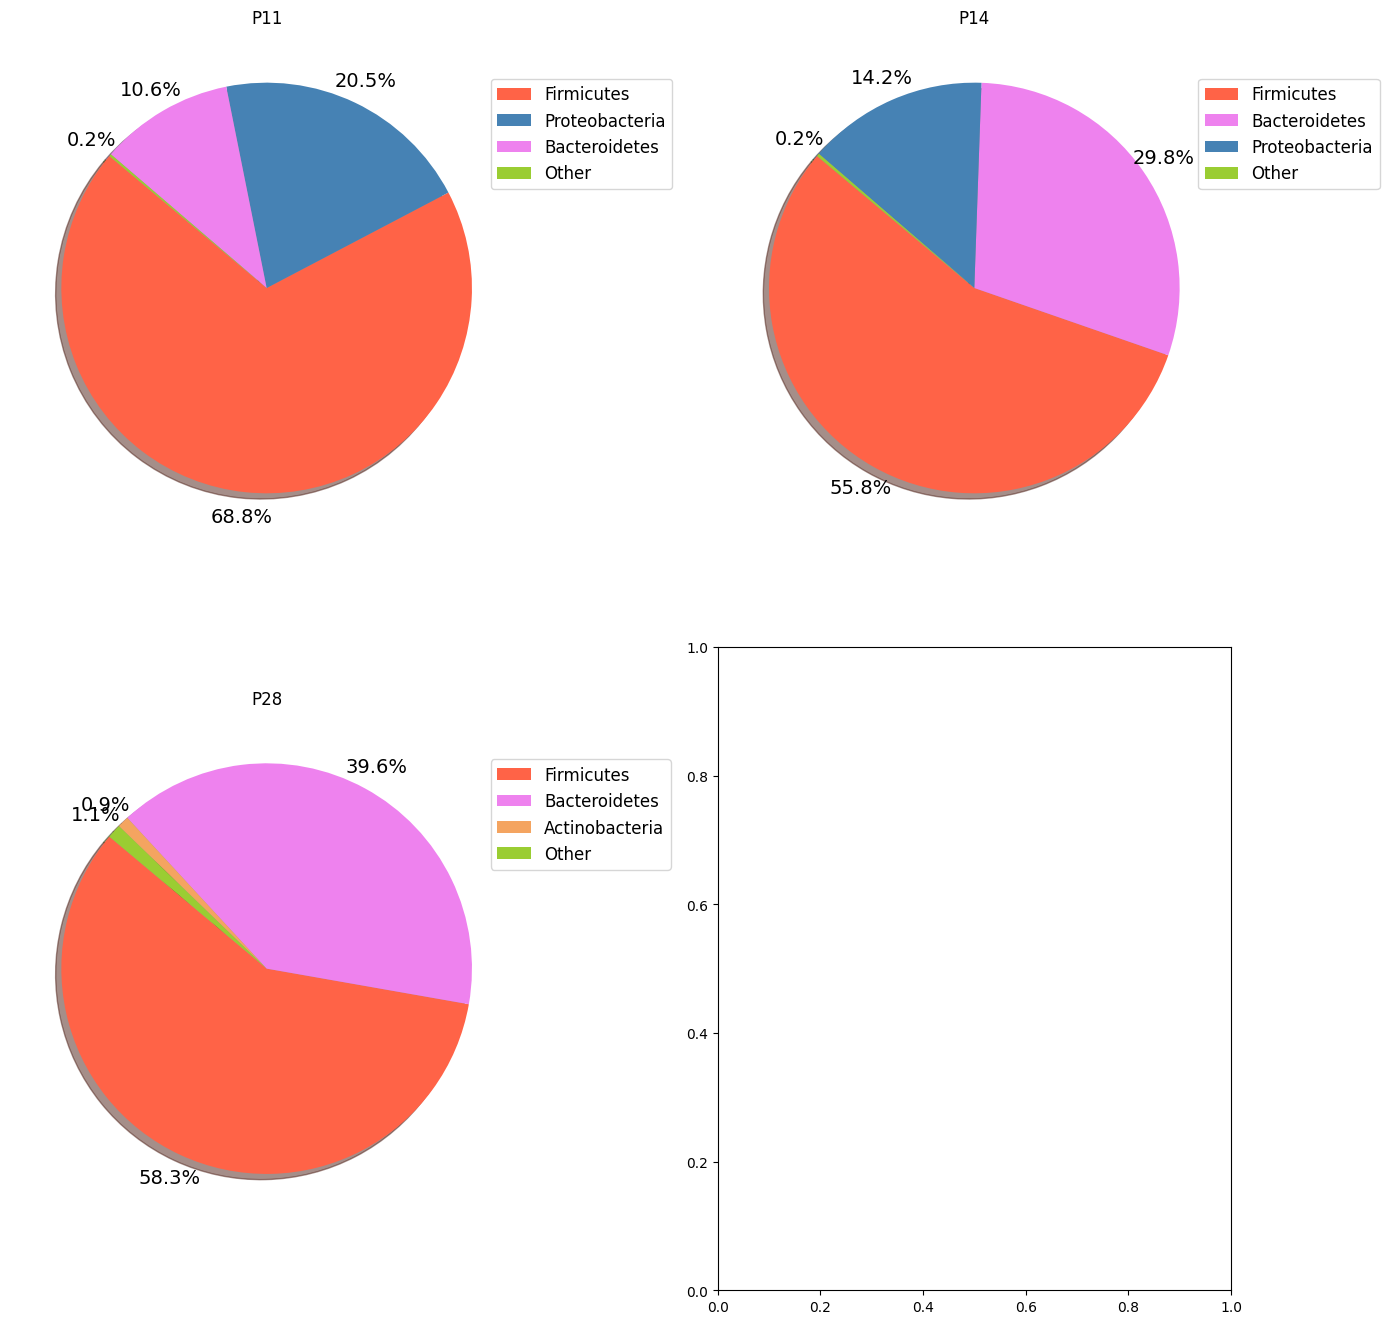

In [29]:
# Define color mapping
color_mapping = {
    'Firmicutes': '#FF6347',
    'Proteobacteria': '#4682B4',
    'Bacteroidetes': '#EE82EE',
    'Actinobacteria': '#F4A460',
    'Euglenozoa': '#8A2BE2',
    'Other': '#9ACD32'
}
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors,pctdistance=1.12, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.92, 0.3, 0.5, 1),fontsize='large')

plt.tight_layout()
plt.show()


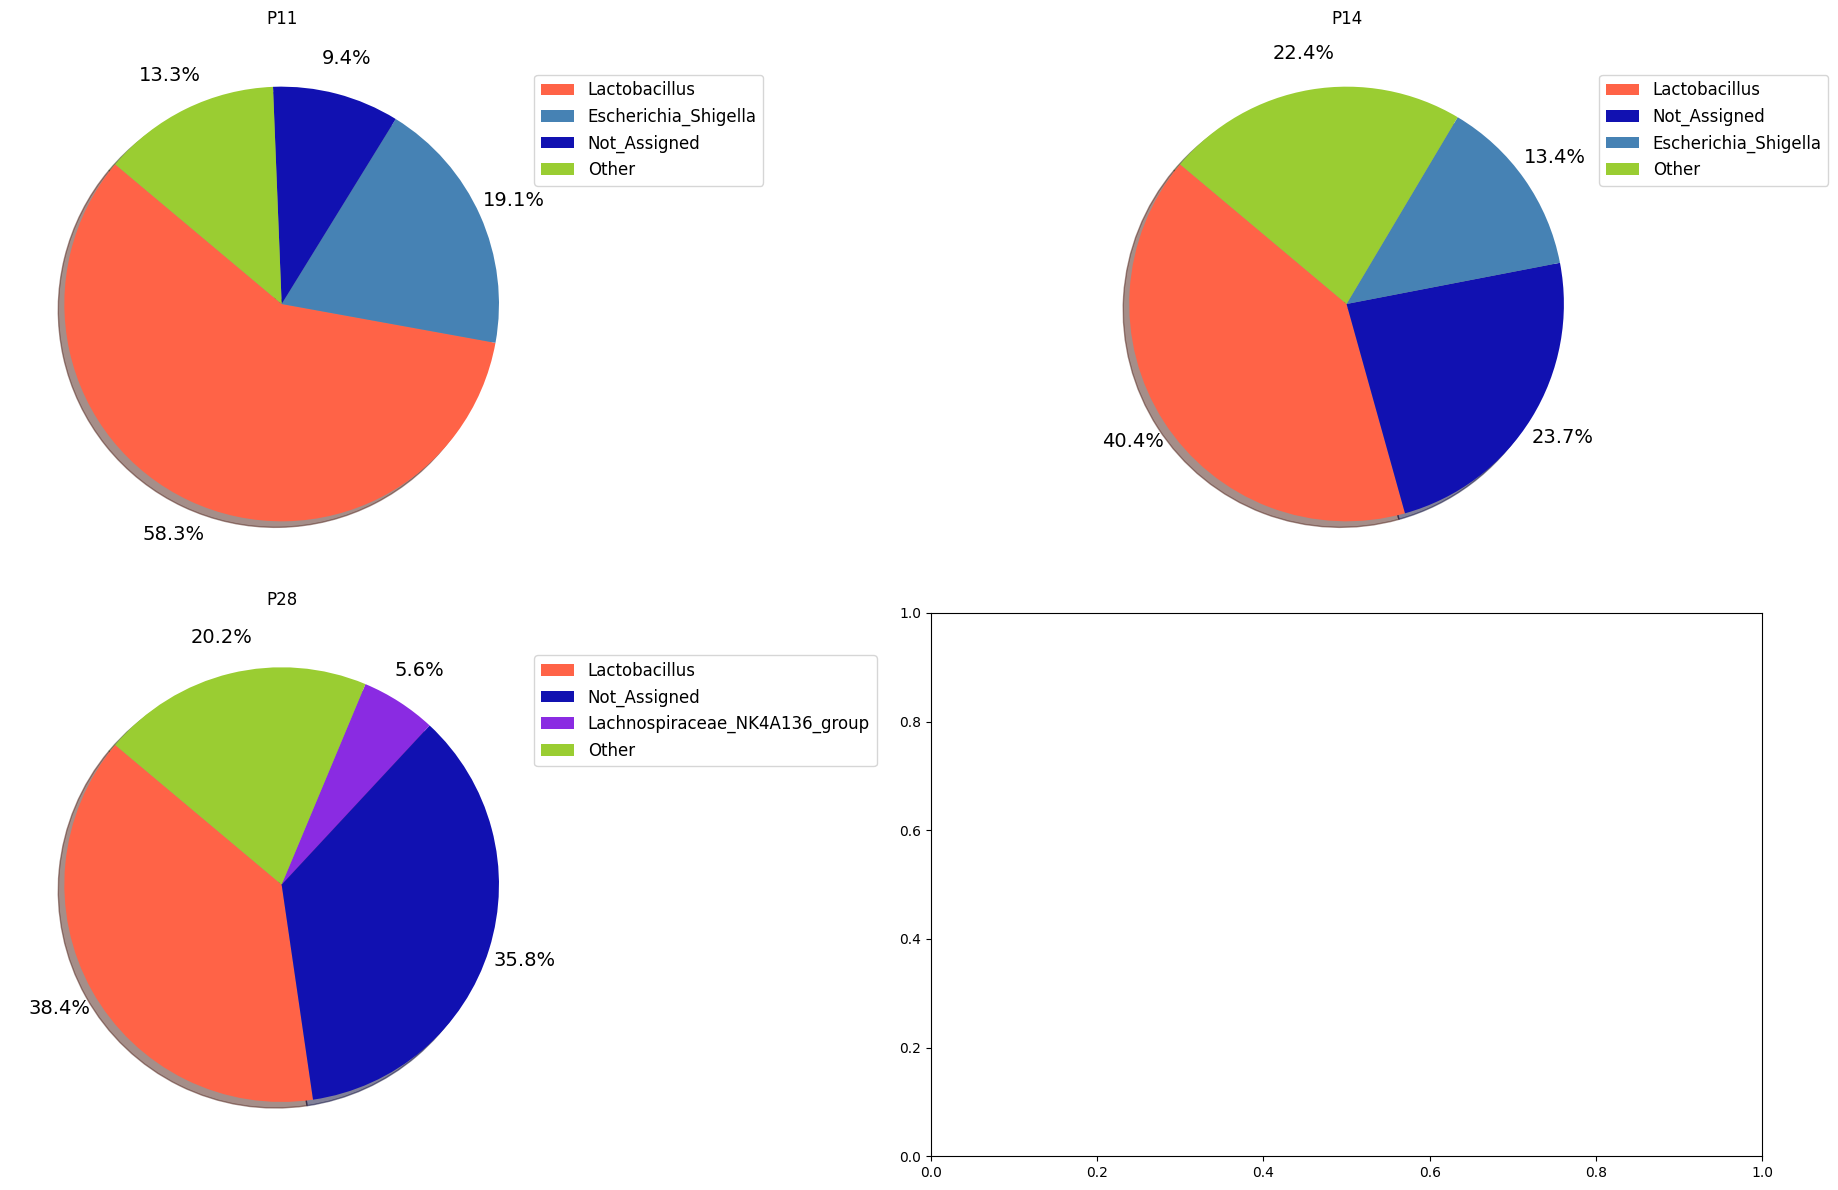

In [30]:
# Load the CSV file
file_path = 'taxa_abund_colon_homo_genus.csv'
data_df = pd.read_csv(file_path)

# dol_mapping = {
#     'P11': ['073B', '075B', '081B', '083B', '085B', '088B', '097B', '105B', '106B', '107B'],
#     'P14': ['140B', '146B', '151B', '156B', '158B', '161B', '162B', '167B', '258B', '259B', '260B', '261B'],
#     'P28': ['111B', '115B', '119B', '120B', '124B', '129B', '134B', '135B']
# }

# DOL groupings and sample identifiers as provided
dol_mapping = {
    "P11": ["050A", "052A", "059A", "064A", "065A", "074A", "086A", "095A", "103A", "229A", "233A", "234A", "237A", "238A", "239A"],
    "P14": ["141A", "142A", "145A", "148A", "149A", "155A", "157A", "163A", "165A", "166A", "168A", "249A", "250A", "252A", "253A", "254A", "256A"],
    "P28": ["109A", "112A", "113A", "114A", "121A", "122A", "126A", "130A", "133A", "138A"]
}

# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)
# Define color mapping
color_mapping = {
    'Lactobacillus': '#FF6347',
    'Escherichia_Shigella': '#4682B4',
    'Not_Assigned': '#1111B1',
    'Bacteroides': '#EE82EE',
    'Streptococcus': '#F4A460',
    'Muribacter': '#FFFF00',
    'Lachnospiraceae_NK4A136_group': '#8A2BE2',
    'Other': '#9ACD32'
}
# Define color mapping
# color_mapping = {
#     'Firmicutes': '#FF6347',
#     'Proteobacteria': '#4682B4',
#     'Bacteroidetes': '#EE82EE',
#     'Actinobacteria': '#F4A460',
#     'Euglenozoa': '#8A2BE2',
#     'Other': '#9ACD32'
# }
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors,pctdistance=1.17, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.95, 0.32, 0.5, 1),fontsize='large')

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_Colon_het_p11-28.csv'
data_df = pd.read_csv(file_path)

# Assigning 'DOL' groups directly as a new row in the DataFrame for clarity
dol_mapping = {
    "P11": ["051A", "058A", "060A", "066A", "067A", "080A", "082A", "084A", "087A", "096A", "102A", "104A", "214A", "216A", "230A", "231A", "232A", "236A", "240A", "251A"],
    "P14": ["143A", "144A", "147A", "150A", "152A", "153A", "154A", "159A", "160A", "164A", "169A", "255A", "257A", "262A", "263A"],
    "P28": ["108A", "110A", "116A", "117A", "118A", "123A", "125A", "127A", "128A", "131A", "132A", "136A", "139A"]
}


# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)

data_df

,051A,058A,060A,066A,067A,080A,082A,084A,087A,096A,...,230A,231A,232A,236A,240A,251A,255A,257A,262A,263A
class,,,,,,,,,,,,,,,,,,,,,
Actinobacteria,0,0,0,0,0,6,0,0,9,11,...,0,0,0,0,0,25,0,12,0,0
Bacteroidetes,1,0,0,0,6,19,13,0,352,23,...,2,0,1579,2871,2227,6294,6082,4870,5853,6121
Deferribacteres,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,50,0,0,23,24
Firmicutes,7107,6555,5976,9224,10302,9654,10096,8121,9534,7955,...,7828,8780,6683,7692,8263,4394,4684,6025,5045,4747
Proteobacteria,3813,4366,4945,1697,613,1242,812,2800,1026,2932,...,3091,2141,2595,202,402,158,155,14,0,9
Tenericutes,0,0,0,0,0,0,0,0,0,0,...,0,0,64,156,26,0,0,0,0,20
DOL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


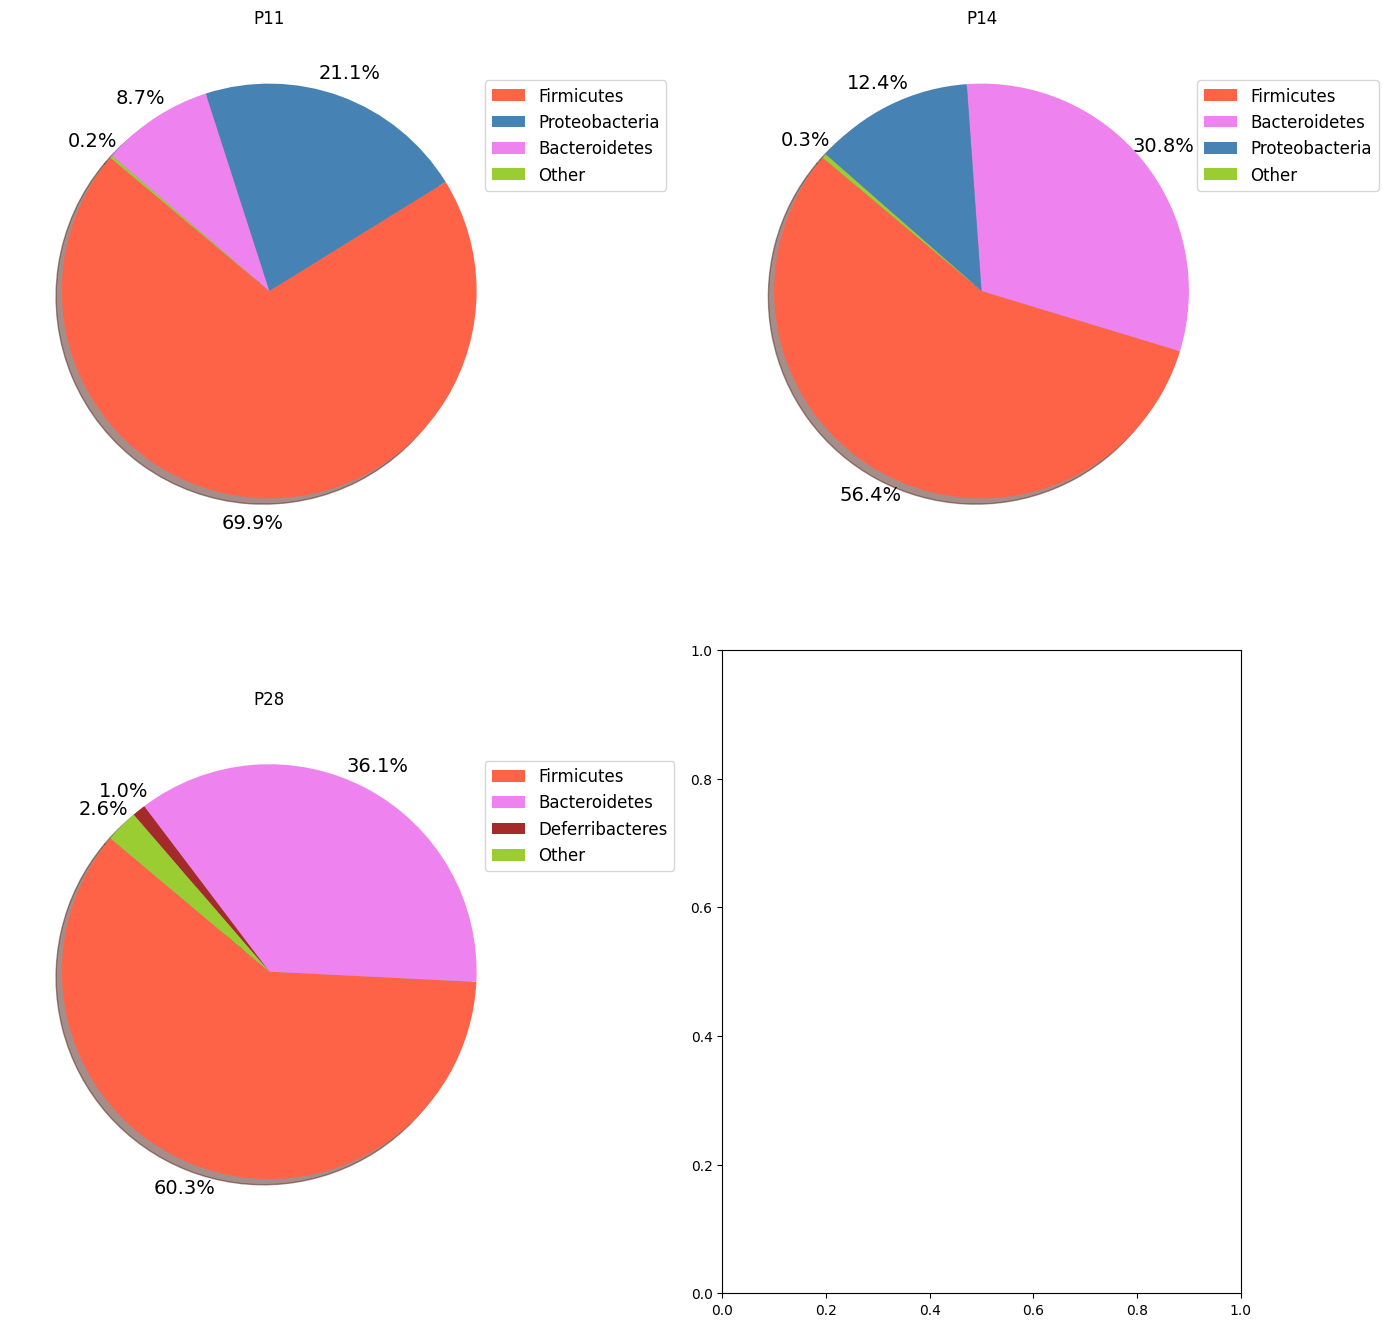

In [32]:
# Define color mapping
color_mapping = {
    'Firmicutes': '#FF6347',
    'Proteobacteria': '#4682B4',
    'Bacteroidetes': '#EE82EE',
    'Actinobacteria': '#F4A460',
    "Deferribacteres":"#A52A2A",
    'Euglenozoa': '#8A2BE2',
    'Other': '#9ACD32'
}
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors,pctdistance=1.12, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.90, 0.3, 0.5, 1),fontsize='large')

plt.tight_layout()
plt.show()

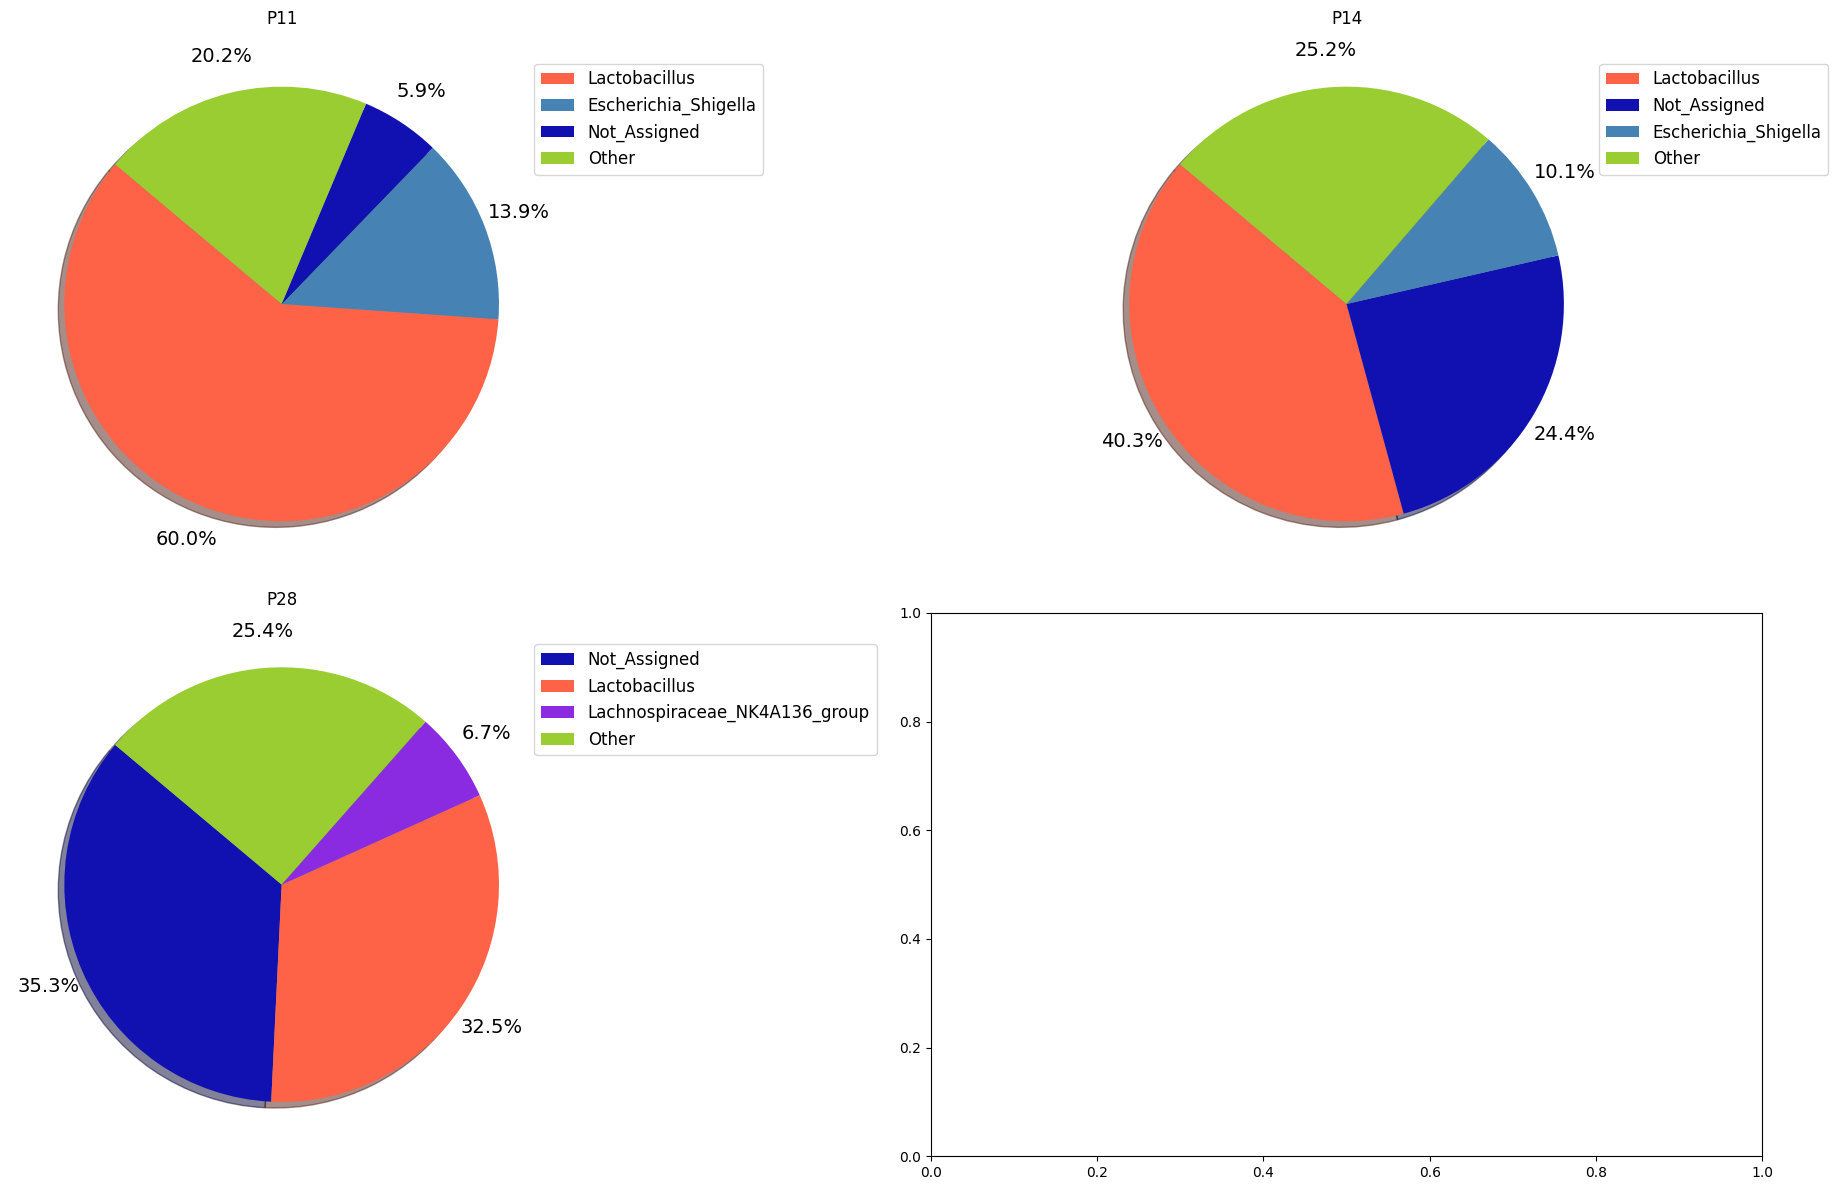

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_colon_het_genus.csv'
data_df = pd.read_csv(file_path)

# Assigning 'DOL' groups directly as a new row in the DataFrame for clarity
dol_mapping = {
    "P11": ["051A", "058A", "060A", "066A", "067A", "080A", "082A", "084A", "087A", "096A", "102A", "104A", "214A", "216A", "230A", "231A", "232A", "236A", "240A", "251A"],
    "P14": ["143A", "144A", "147A", "150A", "152A", "153A", "154A", "159A", "160A", "164A", "169A", "255A", "257A", "262A", "263A"],
    "P28": ["108A", "110A", "116A", "117A", "118A", "123A", "125A", "127A", "128A", "131A", "132A", "136A", "139A"]
}


# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)
# print(dol_sums)
# Define color mapping
color_mapping = {
    'Lactobacillus': '#FF6347',
    'Escherichia_Shigella': '#4682B4',
    'Not_Assigned': '#1111B1',
    'Bacteroides': '#EE82EE',
    'Klebsiella': '#F4A460',
    'Muribacter': '#FFFF00',
    'Lachnospiraceae_NK4A136_group': '#8A2BE2',
    'Other': '#9ACD32'
}
# # Define color mapping
# color_mapping = {
#     'Firmicutes': '#FF6347',
#     'Proteobacteria': '#4682B4',
#     'Bacteroidetes': '#EE82EE',
#     'Actinobacteria': '#F4A460',
#     'Euglenozoa': '#8A2BE2',
#     'Other': '#9ACD32'
# }
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors,pctdistance=1.17, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.95, 0.34, 0.5, 1),fontsize='large')

plt.tight_layout()
plt.show()